# Creating Predictions on Customer Interest to take Vehicle Insurance provided by the Company

--> 'An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.'

--> The customer data is evaluated from the best of 3 models i.e., Logistic Regression, KNN, Random Forest. Thus an usage of 3 models are designed for the evaluation of same data for the best results.

## Data Description
The dataset is taken from 'Kaggle' link: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction. The data elements that are used as 'Variable' notations in the train and test datatsets are clearly defined in the below table.


| Sno.| Variable  | Definition    | 
|---:|:-------------|:-----------|
| 1 | id  | Unique ID for the customer      | 
| 2 | Gender | Gender of the customer  |
| 3 | Age	 | Age of the customer
   |
| 4 | Driving_License	  | 0 : Customer does not have DL, 1 : Customer already has DL |
| 5 | Region_Code | Unique code for the region of the customer |
| 6 | Previously_Insured | 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance  |
| 7 | Vehicle_Age  | Age of the Vehicle    |
| 8 | Vehicle_Damage  |1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. |
| 9 |Annual_Premium | The amount customer needs to pay as premium in the year   |
| 10 | PolicySalesChannel | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
| 11 | Vintage | Number of Days, Customer has been associated with the company  |
| 12 | Response | 1 : Customer is interested, 0 : Customer is not interested  |

In [22]:
#Importing libraries
import pandas as pd
import numpy as np
import pickle

# we want our plots to appear inside the notebook
#matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve

## 1. Loading Train and Test Datasets
Loading the defined information datasets that are downloaded from Kaggle and cleaning the necessary information.

In [2]:
'Importing the data of taining and testing from dataset folder'
dataset_path = 'C:/Users/prade/Python Practice GitHub/Task/dataset/'
train = pd.read_csv(dataset_path + 'train.csv') #train dataset
test = pd.read_csv(dataset_path + 'test.csv') #test dataset
test_copy = test.copy() #taking the same copy of test data for later use

### 1.1 Cleaning Dataset Format and Information

In [3]:
'Train Dataset'
print('train_data') #train data
print('train_shape: ',train.shape)
train.head()

train_data
train_shape:  (381109, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
'Test Dataset'
print('test_data') #test data
print('test_shape: ',test.shape)
test.head()

test_data
test_shape:  (127037, 11)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
  
# creating a dictonary file  
gender = {'Female': 0,'Male': 1} 
vehicle_age = {'< 1 Year': 0,'1-2 Year': 1,'> 2 Years' : 2 } 
damage = {'No': 0,'Yes': 1} 
  
# traversing through dataframe 
# Gender, vehicle age, vehicle damage column and writing 
# values where key matches 

'train data'
train.Gender = [gender[item] for item in train.Gender] 
train.Vehicle_Age = [vehicle_age[item] for item in train.Vehicle_Age] 
train.Vehicle_Damage = [damage[item] for item in train.Vehicle_Damage] 

'test data'
test.Gender = [gender[item] for item in test.Gender] 
test.Vehicle_Age = [vehicle_age[item] for item in test.Vehicle_Age] 
test.Vehicle_Damage = [damage[item] for item in test.Vehicle_Damage] 

In [6]:
#train data after transvering data
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [7]:
#test data after transvering data
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,0,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,0,0,30867.0,152.0,56
127033,508143,0,38,1,28.0,0,1,1,28700.0,122.0,165
127034,508144,1,21,1,46.0,1,0,0,29802.0,152.0,74
127035,508145,1,71,1,28.0,1,1,0,62875.0,26.0,265


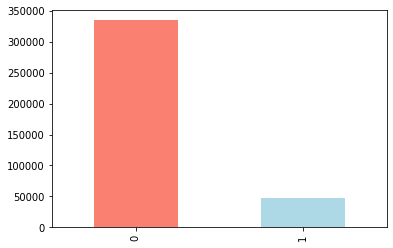

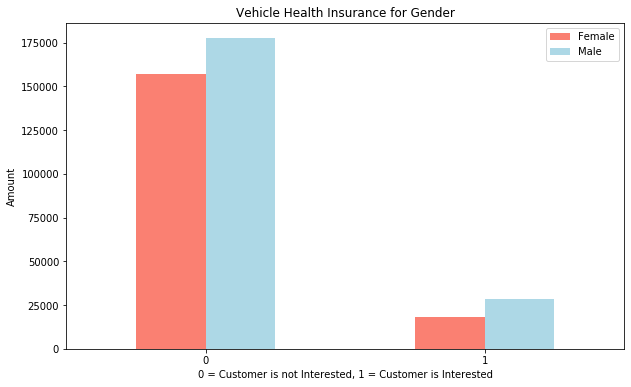

In [8]:
#visualizing datasets of response (target) column using 'sex' data column

plot = train['Response'].value_counts().plot(kind='bar',color=['salmon','lightblue'])
compare = pd.crosstab(train.Response, train.Gender).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Vehicle Health Insurance for Gender")
plt.xlabel("0 = Customer is not Interested, 1 = Customer is Interested")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

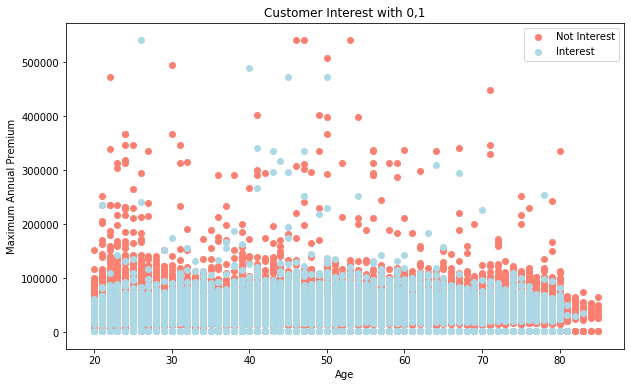

In [9]:
#Visualising Response (target) column with respect to 'Annual_Premium' column

plt.figure(figsize = (10,6))
plt.scatter(train.Age[train.Response==0],train.Annual_Premium[train.Response==0],c='salmon')
plt.scatter(train.Age[train.Response==1],train.Annual_Premium[train.Response==1],c='lightblue')
plt.title('Customer Interest with 0,1')
plt.xlabel('Age')
plt.ylabel('Maximum Annual Premium')
plt.legend(['Not Interest','Interest'])

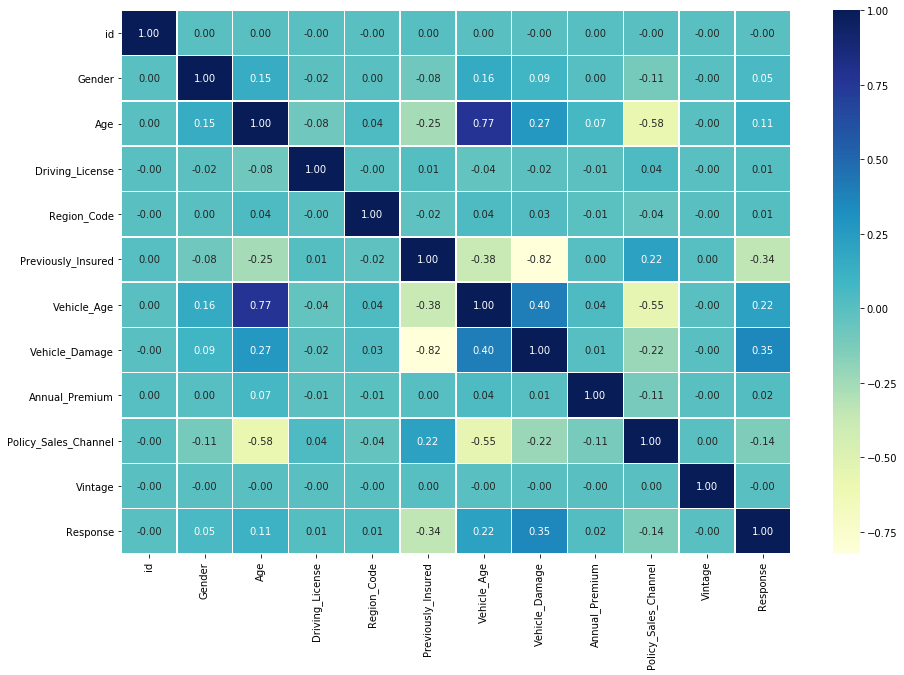

In [10]:
#Making a coorelation matrix and visulaizing the matrix
'This show how better that the data is related to the customized data irrespective of the age,sex,...'

correlation_matrix = train.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

# 2. Design of Three Machine Learning Models 

In [11]:
#Split train data into X, y
'As Response is the target, so it is assigned to dependent variable y'

X_train = train.drop('Response',1)
y_train = train['Response']

In [12]:
print('Input_data: \n')
X_train

Input_data: 



,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1,0,30170.0,26.0,88
381105,381106,1,30,1,37.0,1,0,0,40016.0,152.0,131
381106,381107,1,21,1,30.0,1,0,0,35118.0,160.0,161
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74


In [13]:
print('Target_data: \n')
y_train

Target_data: 



0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

### 2.1 Logistic Regression, KNN, Random Forest (3 Machine Learning models) comparision for the best result

In [14]:
#Creating a machine learning model 

np.random.seed(42)
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#Defining model scores with respective the model defined

def fit_and_score(models, X_train, y_train):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_train, y_train)
    return model_scores

model_scores = fit_and_score(models, X_train, y_train)
model_scores

{'Logistic Regression': 0.877436638861848,
 'KNN': 0.8813384097462931,
 'Random Forest': 0.9999895043150385}

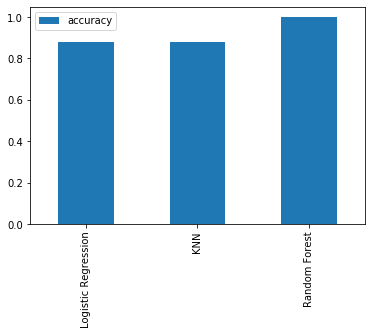

In [15]:
#Plottiing the Model Comparison bar graph
model_comparison = pd.DataFrame(model_scores,index=['accuracy'])
model_comparison.T.plot.bar()

# 3. Evaluation by the Best Model (Random Forest)

In [16]:
# Going with Random Forest Model as it perfomed better among the 3 models.
# Different hyperparameters for the Random Forest model
random_forest_grid = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

### 3.1 Tuning Random Forest Model with Hyperparameters

In [17]:
#Setup Random Seed
np.random.seed(42)

# Setup random hyperparamters search for RandomForestClassifier
model = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=random_forest_grid, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = 5)

# Fit the random hyperparamter search model for the RandomForestClassifier
model.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 out of  40 | elapsed: 14.4min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [20]:
#saving and loading model
model_name ='Health_Insurance_Model.sav'
pickle.dump(model, open(model_name, 'wb'))
load_model = pickle.load(open(model_name, 'rb')) #just loaded but not used

### 3.2 Predictions by the Model using Test Data as Input

C:\Users\prade\Anaconda3\envs\Python3.7\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


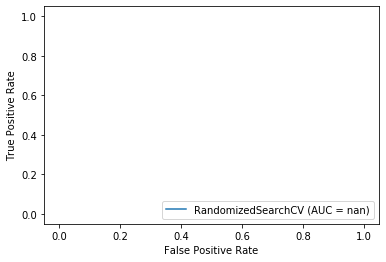

In [24]:
#Make predictions of the model for test data
X_test = test #the test data is taken from given data
y_test = model.predict(X_test)  #predicts the data having heart disease or not

# Plot ROC curve
plot_roc_curve(model, X_test, y_test)

# 4. Visualizing and Saving the Predicted Health Insurance Values

In [26]:
#Viewing the shapes of input, predicted test data 
print('X_test_shape: ', X_test.shape)
print('y_predict_shape: ',y_test.shape)

X_test_shape:  (127037, 11)
y_predict_shape:  (127037,)


In [27]:
#Viewing X_test data 
X_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,0,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,0,0,30867.0,152.0,56
127033,508143,0,38,1,28.0,0,1,1,28700.0,122.0,165
127034,508144,1,21,1,46.0,1,0,0,29802.0,152.0,74
127035,508145,1,71,1,28.0,1,1,0,62875.0,26.0,265


In [28]:
#Viewing original data test_cop that resembels the wordings instead of numericals in X_test
test_copy

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [29]:
#Viewing y_predicted data
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
#adding a 'y_test' column of 'test_copy'
''' Random Forest Model --> 0.9999895043150385
    Response:
    0 --> Customer is not interested,
    1 --> Customer is interested'''

test_copy['Response'] = y_test

In [31]:
#viewing the new dataset obtained with added colum as 'Response'
test_copy

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,0
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,0
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,0
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,0
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,0
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,0
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,0


In [32]:
#To vizualize clearly, marking the predicted values depedning on ID, Gender, Response (0=not interested, 1=interested) of a customer
test_copy[['id','Gender','Response']]

,id,Gender,Response
0,381110,Male,0
1,381111,Male,0
2,381112,Male,0
3,381113,Male,0
4,381114,Male,0
...,...,...,...
127032,508142,Female,0
127033,508143,Female,0
127034,508144,Male,0
127035,508145,Male,0


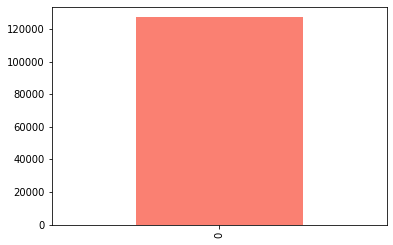

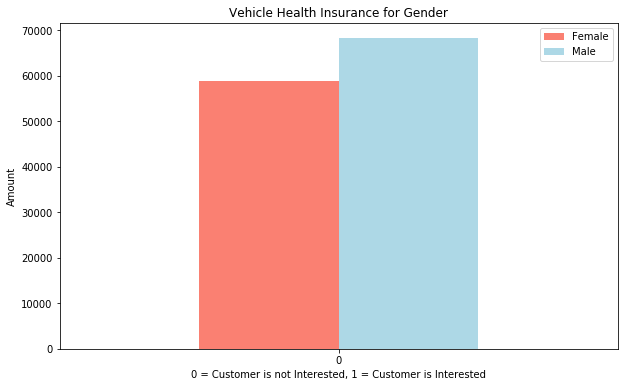

In [33]:
#visualizing datasets of response (target) column using 'sex' data column

plot = test_copy['Response'].value_counts().plot(kind='bar',color=['salmon','lightblue'])
compare = pd.crosstab(test_copy.Response, test_copy.Gender).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Vehicle Health Insurance for Gender")
plt.xlabel("0 = Customer is not Interested, 1 = Customer is Interested")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

--> The above plots show that the Customers are not interested to take the Health Insurance by the Company

In [34]:
#Saving the dataframe including predicted data into excel file
X_test.to_csv('Health_Insurance_Pradeep_Chakravarthi_Nutakki.csv', index = False) 

# 5. Determining the Pre-Trained Model using 100 random Test Data Points.


In [35]:
#The data taken from train model of test data values (unknown)
X=X_test.sample(n = 100) #X as input value
X

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
50104,431214,1,31,1,14.0,1,0,0,24413.0,152.0,25
67615,448725,1,39,1,28.0,0,1,1,32181.0,26.0,234
11445,392555,1,22,1,50.0,1,0,0,26207.0,152.0,75
23629,404739,1,25,1,25.0,1,0,0,32092.0,152.0,206
73503,454613,0,53,1,28.0,0,2,1,46106.0,26.0,199
...,...,...,...,...,...,...,...,...,...,...,...
37324,418434,1,51,1,50.0,0,1,1,2630.0,157.0,246
83044,464154,1,42,1,3.0,0,1,1,32769.0,124.0,139
17284,398394,0,62,1,28.0,0,1,1,45856.0,26.0,292
49784,430894,0,25,1,45.0,1,0,0,2630.0,152.0,235


In [36]:
y=model.predict(X)#y as predict value
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# 6. References
Dataset: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction?select=sample_submission.csv